<a href="https://colab.research.google.com/github/DonRoboto/RedesNeuronales/blob/master/RedNeuronal_RegresionLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modelo de regresión lineal simple sobre un conjunto de datos de calificaciones, lo que deseamos predecir es que calificación tendrá el alumno en un examen. <br> El conjunto de datos posee dos atributos entrada: la calificación que obtuvo en un examen previo y el número de horas que estudio el alumno para presentar el examen. En este ejemplo nos enfocaremos en realizar regresion lineal univariada, por lo tanto, consideraremos únicamente un atributo de entrada, el número de horas de estudio.


In [0]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model

#agregar para graficar en 3D
from mpl_toolkits.mplot3d import Axes3D

# para reproducibilidad
tf.random.set_seed(2020)

In [73]:
df = pd.read_csv('https://raw.githubusercontent.com/DonRoboto/RedesNeuronales/master/data/califs.csv', names=['calif anterior','horas de estudio','calificación'])
df.head(5)

,calif anterior,horas de estudio,calificación
0,5.638,8.289,5.136
1,6.744,9.389,5.931
2,5.136,10.060,5.484
3,5.748,10.421,6.524
4,7.136,10.434,6.770


Graficamos los datos

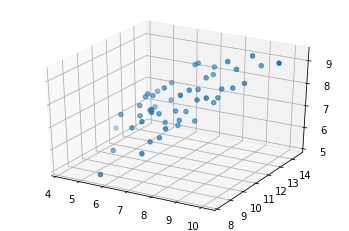

In [74]:
# se obtiene el atributo de entrada y se agrega una dimensión
x_train = np.array(df.iloc[:,0:2])
#[..., np.newaxis]
# se obtiene la salda
y_true_train = np.array(df.iloc[:,-1])
#print(y_true_train)

ax = plt.axes(projection='3d')

# Data for a three-dimensional line
#zline = np.linspace(0, 100, 50)
zline = y_true_train
xline = x_train[:,0]
yline = x_train[:,1]
ax.scatter3D(xline, yline, zline)

A) Los vectores de entrada y la salida pasan a `from_tensor_slices(·)` para obtener una matriz de parejas entrada-salida.

B) Las parejas entrada-salida pasan a `shuffle(·)` para ser barajeadas.

C) La salida del paso B pasa a `batch(·)` para particionar en lotes de entrenamiento.

La siguiente figura ilustra el proceso:

In [0]:
batch_size = 8
# creamos un Dataset de los dos vectores de entrada y salida
ds = tf.data.Dataset.from_tensor_slices((x_train, y_true_train))
# se barajean
ds = ds.shuffle(len(df))
# particionamos en lotes de entrenamiento
ds = ds.batch(batch_size)

## Definición del modelo

In [0]:
#se define la clase RegLin que hereda de tensorflow.keras.Moldel
class RegLin(Model):

  #se define el inicializador
  def __init__(self):
    # se llama al inicializador de la clase padre
    super(RegLin, self).__init__()
    # importante: se definen las capas como atributos de la clase
    self.fc = Dense(1)

  def call(self, x):
    # se realiza inferencia y definición de arquitectura al vuelo
    return self.fc(x)

## Definición de la función perdida

Se define el error cuadrático medio como función de pérdida.

In [0]:
loss_fn = tf.keras.losses.MeanSquaredError() 

Se define el gradiente descendente como optimizador y se le asigna una tasa de aprendizaje.

In [0]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

## Entrenamiento
Realizamos el entrenamiento de nuestro modelo durante dos epocas

In [79]:
# se crea una instacia de la clase
model = RegLin()

epochs = 2
loss_history = []
step = 0

for _ in range(epochs):
    for x, y_true in ds:
        
        # utilizamos tf.GradientTape() para la autodiferenciación
        # todo lo que este dentro del bloque de tape
        # se usara para la retropropagación
        with tf.GradientTape() as tape:
            # inferencia
            y_pred = model(x)
            # cómputo de pérdida
            loss = loss_fn(y_true, y_pred)
        
        # se calculan los gradientes
        gradients = tape.gradient(loss, model.trainable_variables)
        
        # se optimiza el modelo
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        print(step, loss.numpy())
        loss_history.append(loss.numpy())
        
        step += 1


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

0 27.81091
1 10.332502
2 5.259717
3 1.1165227
4 1.7448667
5 1.1820419
6 0.46306583
7 0.26515663
8 0.65131074
9 1.0501319
10 0.72654223
11 0.8298248
12 0.6041522
13 1.4371634


Graficamos la pérdida para ver el comportamiento durante el entrenamiento.

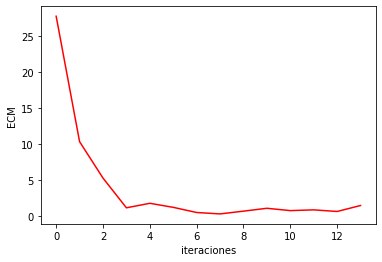

In [80]:
plt.plot(np.arange(len(loss_history)), loss_history, color='red')
plt.xlabel('iteraciones')
plt.ylabel('ECM')
plt.show()

## Inferencia

Graficamos nuestro modelo.

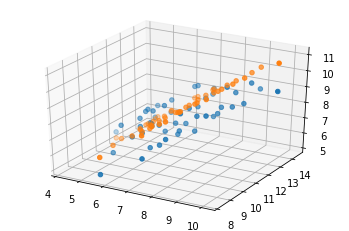

In [81]:
Y_pred = model(x_train)

ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline =y_true_train
xline = x_train[:,0]
yline = x_train[:,1]
ax.scatter3D(xline, yline, zline)

# Data for a three-dimensional line
zline1 = Y_pred[:,0]
xline1 = x_train[:,0]
yline1 = x_train[:,1]
ax.scatter3D(xline1, yline1, zline1)